In [2]:
import numpy as np
import pylab as pl
import sys
sys.path.append("../")

from pvp.common.loggers import DataLogger
from pvp.controller.control_module import ControlModuleBase, get_control_module

In [5]:
dl = DataLogger()                # Get an instance of the data logger, to load compressed hdf5 files

def plot_data(filename):
    """
    Small helper function to translate hdf-file into a plottable list
    """
    dff = dl.load_file(filename) # dff is a dictionary. One can just extract waveform and control data

    ls_wv = dff['waveform_data']
    ls_ct = dff['control_data']
    data = np.zeros((len(ls_wv),2))
    for idx in range(len(ls_wv)):
        data[idx,0] = ls_wv[idx][6]  # time
        data[idx,1] = ls_wv[idx][5]  # pressure
    return data

In [9]:
# Running on the dinky, PEEP=8 with PEEPvalve, PIP=25 with PID
datav = plot_data("./example_logfile/2020-06-08-11-11_controller_log.0.h5")

# Running on the dinkey, PEEP=8 with PID, PIP=25 with PID
datas = plot_data("./example_logfile/2020-06-08-11-01_controller_log.0.h5")

# Running on the dinkey, PEEP=8 with PEEPVALVE, PIP = 35 with PID
datam = plot_data("./example_logfile/2020-06-08-11-17_controller_log.0.h5")

Saving in.../home/manuel/pvp/logs/2020-06-24-11-50-0_controller_log.0.h5
Reading... ./example_logfile/2020-06-08-11-11_controller_log.0.h5


OSError: ``./example_logfile/2020-06-08-11-11_controller_log.0.h5`` does not exist

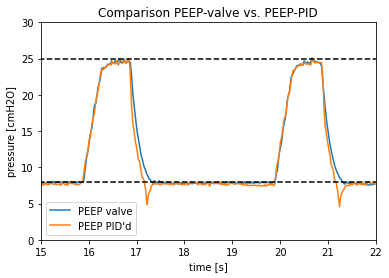

In [6]:
pl.plot(datav[:,0] - np.min(datav[:,0]), datav[:,1], label = "PEEP valve")
pl.plot(datas[:,0] - np.min(datas[:,0]), datas[:,1], label = "PEEP PID'd")

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[25,25],'k--')
pl.xlim([15,22])
pl.ylim([0,30])
pl.legend()
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]")
pl.title("Comparison PEEP-valve vs. PEEP-PID");

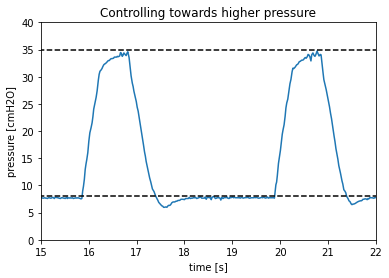

In [7]:
pl.plot(datam[:,0] - np.min(datam[:,0]), datam[:,1])

pl.plot([0,40],[8,8],'k--')
pl.plot([0,40],[35,35],'k--')
pl.xlim([15,22])
pl.ylim([0,40])
pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.title("Controlling towards higher pressure");

In [92]:
#filename = "/home/manuel/vent/logs/2020-07-14-13-55_controller_log.0.h5"
filename = "/home/manuel/vent/logs/no3_2020-07-13.0.h5"

data_pressure = plot_data(filename)

dff = dl.load_file(filename)

ls_wv = dff['waveform_data']
ls_ct = dff['control_data']

data = np.zeros((len(ls_wv),3))
data[:,0] = ls_wv['timestamp']
data[:,1] = ls_wv['control_in']
data[:,2] = ls_wv['flow_out']
    
#Get the target waveform from control commands, logged here:
ls_ct = dff['control_data']

PIP = [s[4] for s in ls_ct if s['name'] == b'ValueName.PIP'][0]
PEEP = [s[4] for s in ls_ct if s['name'] == b'ValueName.PEEP'][0]
PIP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.PIP_TI'][0]
PEEP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.PEEP_T'][0]
INSP_TIME = [s[4] for s in ls_ct if s['name'] == b'ValueName.INSPIR'][0]
BPM = [s[4] for s in ls_ct if s['name'] == b'ValueName.BREATH'][0]
        

Saving in.../home/manuel/vent/logs/2020-07-14-13-55_controller_log.0.h5
Reading... /home/manuel/vent/logs/no3_2020-07-13.0.h5
Saving in.../home/manuel/vent/logs/2020-07-14-13-55_controller_log.0.h5
Reading... /home/manuel/vent/logs/no3_2020-07-13.0.h5


In [93]:
flag_inspiration = [s == 0 for s in data[:,2]]
flag_exspiration = [s != 0 for s in data[:,2]]

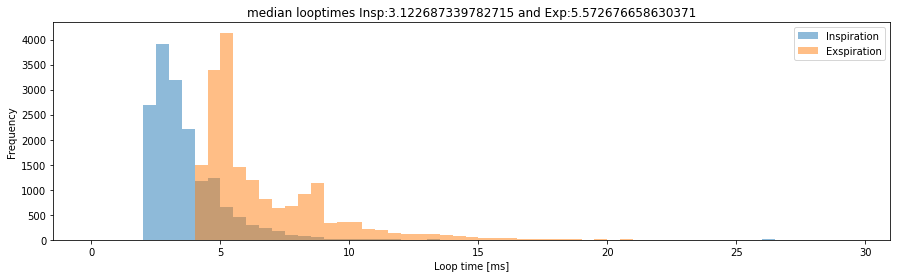

In [97]:
pl.hist(np.diff(data[flag_inspiration,0])*1000,bins=np.arange(0,30,0.5), alpha=0.5, label="Inspiration");
pl.hist(np.diff(data[flag_exspiration,0])*1000,bins=np.arange(0,30,0.5), alpha=0.5, label="Exspiration");
pl.title("median looptimes Insp:" + str(np.median(np.diff(data[flag_inspiration,0]))*1000) + " and Exp:" + str(np.median(np.diff(data[flag_exspiration,0]))*1000))
pl.legend()
pl.xlabel("Loop time [ms]")
pl.ylabel("Frequency")
pl.savefig("/home/manuel/looptime.svg")

Saving in.../home/manuel/vent/logs/2020-07-13-18-32_controller_log.0.h5


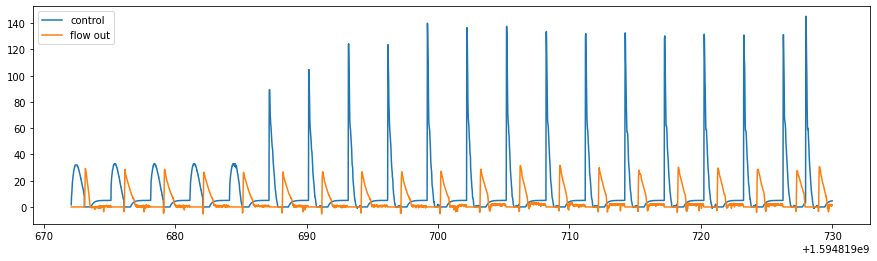

In [44]:
pl.plot(data[:,0], data[:,1], label='control')
pl.plot(data[:,0], data[:,2]*20, label="flow out")
pl.legend()

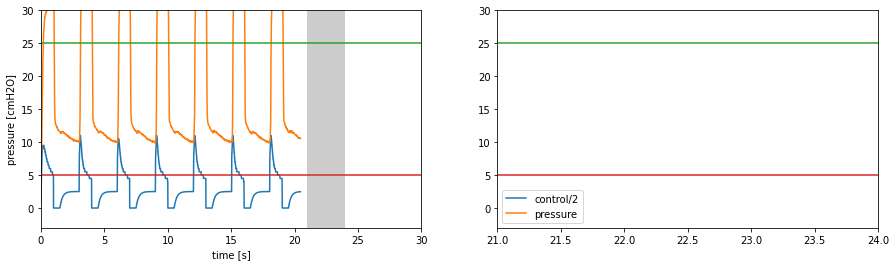

In [19]:
pl.rcParams['figure.figsize'] = [15, 4]

t1 = 21
t2 = t1+3
p0 = -3

PEEP=5
PIP=25
p1 =PIP+5


pl.subplot(1,2,1)
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1]/2)
pl.plot(data_pressure[:,0] - np.min(data_pressure[:,0]), data_pressure[:,1])
pl.plot((0, 30),(PIP,PIP))
pl.plot((0, 30),(PEEP,PEEP))
#pl.plot([0,9],[10,10],'k--')
# pl.plot([30,60],[27.5,27.5],'k--')
pl.ylim([p0,p1])
#pl.xlim([0,70])
pl.xlim([0,30])

pl.xlabel("time [s]")
pl.ylabel("pressure [cmH2O]");
pl.gca().add_patch( pl.Rectangle((t1, p0), t2-t1, p1-p0, facecolor="black", alpha=0.2))

pl.subplot(1,2,2)
pl.plot(data[:,0] - np.min(data[:,0]), data[:,1]/2, label="control/2")
pl.plot(data_pressure[:,0] - np.min(data_pressure[:,0]), data_pressure[:,1], label = "pressure")
pl.plot((0, 30),(PIP,PIP))
pl.plot((0, 30),(PEEP,PEEP))
pl.legend();
t_target = [x+6 for x in [0,PIP_TIME,INSP_TIME,INSP_TIME,PEEP_TIME+INSP_TIME,60/BPM]]
#pl.plot(t_target, [PEEP, PIP, PIP,PEEP,PEEP,PEEP],'o-')
pl.ylim([p0,p1])
pl.xlim([t1,t2]);

In [9]:
import tables as pytb


In [14]:
file = pytb.open_file('/Users/ms81/pvp/logs/2020-08-26-11-58_controller_log.0.h5', mode = "r")

In [16]:
file.root

/ (RootGroup) ''
  children := ['controls' (Group), 'derived_quantities' (Group), 'waveforms' (Group)]

In [18]:
dff = dl.load_file('/Users/ms81/pvp/logs/2020-08-26-11-58_controller_log.0.h5')

Saving in.../Users/ms81/pvp/logs/2020-08-26-12-01_controller_log.0.h5
Reading... /Users/ms81/pvp/logs/2020-08-26-11-58_controller_log.0.h5


In [22]:
dl.log2mat('/Users/ms81/pvp/logs/2020-08-26-12-20_controller_log.0.h5')

Saving in.../Users/ms81/pvp/logs/2020-08-26-12-01_controller_log.0.h5
Reading... /Users/ms81/pvp/logs/2020-08-26-12-20_controller_log.0.h5


In [1]:
import numpy as np
import pylab as pl
import sys
import time
sys.path.append("../")

from pvp.common.loggers import DataLogger
from pvp.controller.control_module import ControlModuleBase, get_control_module
from pvp.common.message import ControlSetting, SensorValues
from pvp.common.values import ValueName
from pvp.alarm import Alarm, AlarmType

In [5]:
Controller = get_control_module(sim_mode=True, simulator_dt=0.01)
Controller._LOOP_UPDATE_TIME = 0.01

Controller.set_breath_detection(True)
assert Controller.get_breath_detection() == True

vals_start = Controller.get_sensors()

command = ControlSetting(name=ValueName.PEEP, value=5)
Controller.set_control(command)

command = ControlSetting(name=ValueName.PIP, value=20)
Controller.set_control(command)

command = ControlSetting(name=ValueName.BREATHS_PER_MINUTE, value=3)
Controller.set_control(command)

command = ControlSetting(name=ValueName.INSPIRATION_TIME_SEC, value=0.3)
Controller.set_control(command)
    
pp = np.array([])
tt = np.array([])
Controller.start()
time.sleep(0.1)
for i in range(100):
    time.sleep(0.1)
    if time.time() - Controller._cycle_start > 1:
        for i in range(500):
            Controller._DATA_PRESSURE_LIST.append(0.1)
    vals_start = Controller.get_sensors()
    pp = np.append(pp, vals_start.PRESSURE)
    tt = np.append(tt, time.time())

Controller.stop() # consecutive stops should be ignored

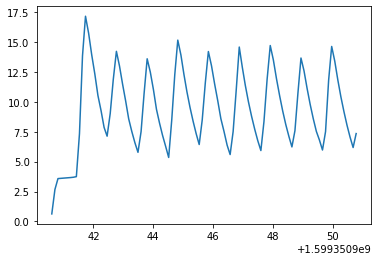

In [7]:
pl.plot(tt, pp)

In [2]:
Controller = get_control_module(sim_mode=False, simulator_dt=0.01)

2020-09-06 12:44:15,583 - pvp.controller.control_module - WARNING - TIMEOUT - HAL not initialized. Using MockHAL


TIMEOUT - HAL not initialized


In [3]:
pressures  = []
oxygens    = []
flows      = [] 

Controller.start()
time.sleep(0.1)
temp_vals = Controller.get_sensors()
while temp_vals.breath_count < 5:                    # Random HAL
    Controller.HAL.pressure    = 100*np.random.random()-50
    Controller.HAL.flow_ex     = 100*np.random.random()-50
    Controller.HAL.setpoint_in = 100*np.random.random()-50
    Controller.HAL.setpoint_ex = 100*np.random.random()-50
    Controller.HAL.oxygen      = 100*np.random.random()-50
    time.sleep(0.1)
    temp_vals = Controller.get_sensors()

    pressures = np.append(pressures, temp_vals.PRESSURE)
    oxygens = np.append(oxygens, temp_vals.FIO2)
    flows = np.append(flows, temp_vals.FLOWOUT)

while temp_vals.breath_count < 10:                    # Stuck HAL
    Controller.HAL.pressure = 0
    Controller.HAL.flow_ex = 0
    Controller.HAL.oxygen = -10
    time.sleep(0.1)
    temp_vals = Controller.get_sensors()

Controller.stop()

assert np.isfinite( np.mean(pressures) )
assert np.isfinite( np.mean(oxygens) )
assert np.isfinite( np.mean(flows) )

for alarms in Controller.get_alarms():
    assert type(alarms[0]) == Alarm
assert temp_vals.breath_count == 10

2020-09-06 12:44:18,315 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,316 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,317 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,319 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,323 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,324 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,325 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:18,553 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,556 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,560 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,565 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,572 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,574 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:18,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,712 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,722 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,724 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:18,917 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,923 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,925 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:18,930 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:19,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,085 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,086 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,092 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,093 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,095 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,096 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:19,405 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,407 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,412 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,419 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,421 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:19,664 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,666 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,667 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,668 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,670 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,675 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,677 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:19,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,893 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,896 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,898 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,902 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,904 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:19,905 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:20,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,032 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,034 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,035 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,037 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,038 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,040 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,041 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,043 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:20,362 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,366 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,369 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,370 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,374 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,376 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,378 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:20,699 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,700 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,703 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,705 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,709 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,712 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:20,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,848 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,853 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,855 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:20,983 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,985 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,987 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,989 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:20,992 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,002 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,004 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,006 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,008 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:21,134 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,135 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,137 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,141 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,149 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,150 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:21,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,274 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,275 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,277 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,279 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,281 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,282 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,284 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,286 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,287 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:21,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,411 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,413 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,416 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,418 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,420 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,421 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,423 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:21,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,595 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,601 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,605 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:21,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,737 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,739 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,740 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,744 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,745 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,747 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,749 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,751 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:21,873 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,875 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,877 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,878 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,881 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,882 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,884 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,885 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:21,889 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:22,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,085 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,091 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,093 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,094 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,096 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:22,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,221 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,223 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,228 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,230 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,234 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:22,366 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,369 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,371 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,374 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,376 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,379 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,381 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:22,608 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,610 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,612 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,614 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,616 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,618 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,619 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,621 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,623 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,625 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:22,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,758 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,760 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,762 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,764 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,766 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,768 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,770 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,772 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,774 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:22,911 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,913 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,915 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,917 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,919 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,925 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:22,928 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:23,134 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,136 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,137 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,141 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,149 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,151 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:23,284 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,286 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,288 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,290 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,291 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,293 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,295 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,297 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,299 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,300 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:23,432 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,437 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,443 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,445 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,447 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,449 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:23,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,662 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,664 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,666 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,668 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,679 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:23,814 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,825 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,830 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:23,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,977 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,982 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:23,985 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:24,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,173 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,175 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,177 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,179 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,182 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,183 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,185 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,187 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:24,336 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,338 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,342 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,347 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,351 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,356 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,358 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:24,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,534 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,539 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,547 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,549 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,551 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:24,748 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,750 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,752 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,757 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,759 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,762 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,764 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,766 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:24,906 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,907 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,909 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,911 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,913 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,915 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,917 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:24,922 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:25,068 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,070 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,072 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,074 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,079 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,083 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,085 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:25,222 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,224 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,228 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,230 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,232 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,267 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:25,398 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,400 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,402 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,404 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,406 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,411 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,413 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,417 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:25,591 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,601 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,608 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,610 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:25,771 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,773 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,775 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,776 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,780 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,781 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,784 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,786 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,790 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,793 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:25,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,940 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,942 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,944 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,946 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,949 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,951 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,952 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,955 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:25,957 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:26,107 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,110 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,113 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,115 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,125 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:26,297 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,299 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,301 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,302 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,305 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,308 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,311 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,313 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,316 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,318 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:26,483 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,485 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,503 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,505 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,507 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,509 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:26,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,661 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,663 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,665 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,666 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,668 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,669 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,673 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,675 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:26,800 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,803 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,805 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,807 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,808 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,810 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,812 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,814 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,816 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:26,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,981 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,983 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,986 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,989 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,992 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:26,999 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:27,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,149 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,154 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,156 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,158 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,161 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,163 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:27,306 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,307 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,310 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,313 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,314 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,316 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,324 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:27,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,490 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,497 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,502 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,504 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,506 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,512 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:27,658 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,662 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,664 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,666 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,667 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,675 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,679 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:27,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,856 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:27,857 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:28,010 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,013 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,014 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,017 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,032 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:28,162 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,165 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,167 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,168 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,173 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,174 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,177 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,178 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:28,340 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,348 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,352 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,355 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,357 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,359 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:28,526 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,530 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,534 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,536 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,538 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,545 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:28,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,685 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,690 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,693 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,695 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,697 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,699 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:28,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,855 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,859 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,861 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,863 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,866 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:28,868 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:29,019 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,024 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,032 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,035 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,037 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:29,183 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,185 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,186 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,188 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,190 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,192 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,195 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,199 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,202 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:29,340 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,347 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,349 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,352 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,355 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:29,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,501 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,503 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,505 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,507 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,510 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,512 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,514 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,516 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:29,640 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,642 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,646 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,649 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,651 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,653 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,654 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,657 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:29,798 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,800 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,802 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,806 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,807 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,809 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,811 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,813 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,816 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:29,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,981 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,983 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,985 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:29,987 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:30,111 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,112 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,116 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,127 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:30,253 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,258 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,268 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:30,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,436 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,437 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,440 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,443 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,445 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,446 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:30,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,608 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,609 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,611 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,613 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,615 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,616 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,618 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,620 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,621 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:30,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,744 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,746 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,751 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,753 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,757 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,759 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,760 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:30,887 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,910 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,912 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,913 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,915 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,916 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,919 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:30,921 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:31,042 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,044 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,046 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,050 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,051 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,052 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,055 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,056 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,058 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,060 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:31,183 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,184 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,185 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,188 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,190 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,191 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,192 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,194 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,198 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:31,323 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,325 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,328 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,333 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,334 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,336 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,338 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,375 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:31,515 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,518 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,520 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,522 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,524 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,526 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,531 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,533 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:31,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,662 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,663 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,665 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,667 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,668 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,670 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,673 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,675 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:31,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,803 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,806 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,807 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,809 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,810 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,812 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,815 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:31,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,977 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,981 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:31,982 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:32,106 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,107 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,109 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,111 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,113 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,115 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,116 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,121 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:32,243 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,246 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,262 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:32,431 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,432 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,436 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,437 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,440 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,442 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,446 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:32,585 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,587 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,589 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,593 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,595 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,600 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:32,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,725 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,726 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,728 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,730 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,732 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,734 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,737 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,738 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:32,890 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,893 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,894 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,896 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,900 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,902 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,904 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:32,905 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:33,036 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,038 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,041 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,043 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,047 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,049 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,051 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,053 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,054 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,056 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:33,193 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,199 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,202 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,204 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,206 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,209 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,211 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,214 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:33,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,375 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,379 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,381 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,385 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,386 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,388 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,390 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:33,533 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,538 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,546 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,548 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,550 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,552 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:33,690 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,693 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,695 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,697 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,700 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,701 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,704 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:33,706 - pvp.controller.control_module - WARNING - Implausible va

In [4]:
Controller.start()

Controller.set_control(command)
command = ControlSetting(name=ValueName.PIP, value=20)
Controller.set_control(command)
command = ControlSetting(name=ValueName.PEEP, value=5)

while temp_vals.breath_count < 12:                    # NAN HAL
    Controller.HAL.pressure = np.nan
    time.sleep(0.1)
    temp_vals = Controller.get_sensors()

Controller.stop()

2020-09-06 12:44:45,323 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,334 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,336 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,338 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,340 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,342 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,346 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,348 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:45,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,546 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,550 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,556 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,560 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,564 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,573 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:45,743 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,745 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,747 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,749 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,750 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,752 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,757 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,759 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:45,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,894 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,903 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,905 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,907 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:45,909 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:46,042 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,044 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,046 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,048 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,050 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,051 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,053 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,055 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,057 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,059 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:46,198 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,199 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,201 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,204 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,205 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,209 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,211 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,213 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,215 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:46,355 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,357 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,360 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,362 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,369 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,371 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,375 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:46,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,604 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,608 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,610 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,612 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,614 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,616 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:46,752 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,758 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,760 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,761 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,763 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,765 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,767 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,769 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:46,911 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,913 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,915 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:46,931 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:47,156 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,158 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,162 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,164 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,165 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,167 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,173 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:47,309 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,312 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,314 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,316 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,320 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,324 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,328 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:47,473 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,475 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,477 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,478 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,480 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,482 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,484 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,486 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,490 - pvp.controller.control_module - WARNING - Implausible va

NameError: name 'command' is not defined

2020-09-06 12:44:47,642 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,645 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,648 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,650 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,651 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,653 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,655 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,657 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:47,782 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,783 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,785 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,787 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,789 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,791 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,793 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,795 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,797 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,799 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:47,915 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,916 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,919 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,921 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,923 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:47,929 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:48,053 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,055 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,057 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,058 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,060 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,062 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,064 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,147 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:48,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,262 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,271 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:48,386 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,387 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,389 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,390 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,394 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,397 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,399 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,400 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:48,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,523 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,525 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,528 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,530 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,533 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,539 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:48,741 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,744 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,746 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,748 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,750 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,751 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,753 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,755 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,757 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:48,880 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,882 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,883 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,885 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,887 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,890 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,894 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:48,895 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:49,016 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,022 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,027 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,032 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:49,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,234 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,236 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,239 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,243 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,246 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:49,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,375 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,378 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,380 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,382 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,385 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,387 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:49,516 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,518 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,519 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,523 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,525 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,527 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,531 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,533 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:49,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,725 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,726 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,728 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,729 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,733 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,734 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,736 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,737 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:49,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,863 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,864 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,866 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,868 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,869 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,871 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,873 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,874 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:49,876 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:50,000 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,002 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,003 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,005 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,007 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,009 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,010 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,012 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,014 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,016 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:50,177 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,178 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,180 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,182 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,183 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,184 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,186 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,187 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,189 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,190 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:50,305 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,307 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,309 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,310 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,312 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,314 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,315 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,317 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,319 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,320 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:50,442 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,445 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,447 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,449 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,450 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,451 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,453 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,455 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,457 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:50,632 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,634 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,635 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,639 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,643 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,646 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,648 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:50,763 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,764 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,766 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,768 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,769 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,771 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,772 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,774 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,775 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,777 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:50,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,894 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,900 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,903 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,904 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:50,906 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:51,063 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,065 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,066 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,068 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,069 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,071 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,072 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,074 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,077 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:51,194 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,195 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,199 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,200 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,201 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,203 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,205 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,208 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:51,342 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,348 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,349 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,351 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,352 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,354 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,356 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,358 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:51,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,531 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,533 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,546 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,548 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,550 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:51,685 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,687 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,690 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,692 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,697 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,698 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,700 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,701 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:51,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,833 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,836 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,845 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:51,847 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:52,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,022 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,026 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,029 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,031 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,033 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,034 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:52,166 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,168 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,172 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,174 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,176 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,178 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,179 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,181 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:52,306 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,307 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,309 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,310 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,312 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,314 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,315 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,317 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,320 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:52,478 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,479 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,481 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,482 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,483 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,485 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,486 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,490 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,491 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:52,629 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,630 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,632 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,634 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,635 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,638 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,640 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,642 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,643 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:52,768 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,770 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,772 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,773 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,775 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,776 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,778 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,781 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,782 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,784 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:52,950 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,951 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,953 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,954 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,956 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,957 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,959 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,961 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:52,965 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:53,099 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,101 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,103 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,105 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,106 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,110 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,112 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,116 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:53,240 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,242 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,246 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,249 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,251 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,253 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,256 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:53,387 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,389 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,390 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,428 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,431 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,436 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,437 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:53,580 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,581 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,583 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,584 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,586 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,588 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,595 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:53,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,733 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,736 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,738 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,741 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,743 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,746 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,748 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,750 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:53,883 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,885 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,886 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,890 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,893 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,896 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:53,898 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:54,046 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,048 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,050 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,052 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,053 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,055 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,057 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,059 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,060 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,062 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:54,184 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,185 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,187 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,189 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,190 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,193 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,194 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,196 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,198 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,199 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:54,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,324 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,328 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,332 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,340 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,342 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:54,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,498 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,501 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,503 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,504 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,506 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,510 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:54,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,681 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,689 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,691 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:54,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,855 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:54,857 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:55,044 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,046 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,049 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,052 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,054 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,056 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,058 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,060 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,061 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,064 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:55,221 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,223 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,227 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,232 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,236 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,246 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:55,424 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,427 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,432 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,437 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,447 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:55,627 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,629 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,631 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,633 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,635 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,639 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,642 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,645 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:55,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,803 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,806 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,808 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,811 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,813 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,818 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,821 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:55,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,966 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,983 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:55,984 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:56,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,130 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,132 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:56,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,266 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,270 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,274 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,275 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:56,398 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,400 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,402 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,403 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,405 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,407 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,412 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,414 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:56,588 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,596 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,601 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,605 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:56,743 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,746 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,747 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,749 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,751 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,752 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,757 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,760 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:56,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,903 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,905 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,906 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,908 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,910 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,912 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,914 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:56,916 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:57,065 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,069 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,071 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,077 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,079 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,083 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,086 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:57,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,217 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,219 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,223 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,227 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,229 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,233 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:57,368 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,370 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,374 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,379 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,381 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,384 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,386 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:57,553 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,561 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,563 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,572 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,574 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,575 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:57,708 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,724 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,726 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,728 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:57,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,851 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,853 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,855 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,858 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,861 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:57,863 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:58,016 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,026 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,029 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,031 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,033 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:58,162 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,164 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,166 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,168 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,173 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,175 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,177 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,180 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:58,309 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,311 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,313 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,315 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,316 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,319 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,323 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,325 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:58,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,493 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,498 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,499 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,501 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,503 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,505 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,506 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:58,666 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,669 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,675 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,678 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,683 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:58,810 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,813 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,815 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,818 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,829 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:58,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,981 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,983 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,986 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,987 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,989 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,991 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:58,992 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:59,115 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,126 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,131 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:59,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,256 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,258 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,262 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,269 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:59,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,394 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,397 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,398 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,400 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,401 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,448 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,449 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,450 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,452 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:59,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,596 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,601 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,605 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,608 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:59,736 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,738 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,740 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,743 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,745 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,747 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,749 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,750 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,752 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:44:59,886 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,889 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,893 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:44:59,902 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:00,079 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,085 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,094 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,096 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:00,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,222 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,223 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,227 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,228 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,230 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,232 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,235 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:00,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,366 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,369 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,371 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,374 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,376 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,378 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,380 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:00,530 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,534 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,538 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,539 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,543 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,545 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,548 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:00,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,680 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,681 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,689 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,694 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:00,812 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,814 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,826 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:00,988 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,991 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,994 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,995 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:00,999 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,000 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,002 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,004 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:01,131 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,132 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,134 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,135 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,137 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,140 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,146 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:01,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,271 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,273 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,274 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,276 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,278 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,280 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,282 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,285 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:01,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,445 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,447 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,449 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,451 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,452 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,454 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,456 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,459 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,461 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:01,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,607 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,609 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,611 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,614 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,618 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,620 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,623 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:01,747 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,748 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,749 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,751 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,752 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,757 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,760 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,764 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:01,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,931 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,936 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,938 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,940 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,942 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,943 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:01,945 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:02,070 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,072 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,074 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,076 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,077 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,079 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,087 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:02,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,228 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,230 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,234 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,236 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,240 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:02,460 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,463 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,466 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,469 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,472 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,475 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,480 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,483 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,485 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,489 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:02,651 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,652 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,654 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,655 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,657 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,658 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,661 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,663 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,665 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:02,791 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,793 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,795 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,796 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,798 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,800 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,803 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,806 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:02,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,970 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,977 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:02,980 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:03,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,126 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,131 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,132 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,134 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,136 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,138 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:03,242 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,246 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,249 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,251 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,253 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,256 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:03,405 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,407 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,412 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,416 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,418 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,419 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,421 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:03,551 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,553 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,556 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,559 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,561 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,564 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,569 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:03,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,715 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,725 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,727 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:03,880 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,882 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,884 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,886 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,889 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,894 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:03,895 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:04,022 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,024 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,027 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,032 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,034 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,036 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,037 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:04,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,161 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,164 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,166 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,167 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,170 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,172 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,173 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,175 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:04,337 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,347 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,349 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,351 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,355 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:04,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,539 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,547 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,562 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,574 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,577 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:04,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,724 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,725 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,727 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,729 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,730 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:04,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,867 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,869 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,870 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,872 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,874 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,880 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,882 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:04,883 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:05,019 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,022 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,024 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,027 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,032 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,034 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:05,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,152 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,154 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,155 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,156 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,158 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:05,266 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,270 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,273 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,274 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,276 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,277 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,315 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:05,422 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,425 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,428 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,431 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,436 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:05,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,596 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,604 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,609 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,611 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:05,788 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,792 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,794 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,796 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,800 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,802 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,806 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,808 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,810 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:05,958 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,960 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,970 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:05,978 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:06,096 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,098 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,099 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,101 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,102 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,104 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,105 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,106 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,109 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:06,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,216 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,217 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,218 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,221 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,223 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,224 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,227 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:06,355 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,356 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,358 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,359 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,361 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,362 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,365 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,368 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:06,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,490 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,492 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,493 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,498 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,499 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,500 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:06,627 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,629 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,630 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,631 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,633 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,634 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,636 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,639 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,640 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:06,772 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,773 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,775 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,776 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,777 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,778 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,780 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,781 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,782 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,784 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:06,878 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,880 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,882 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,884 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,885 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,886 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,889 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,890 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,892 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:06,991 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,993 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,994 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,995 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,998 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:06,999 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,001 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,002 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,003 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:07,138 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,140 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,149 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,150 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:07,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,250 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,251 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,256 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,258 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,260 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:07,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,366 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,368 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,370 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,371 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,375 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,377 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:07,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,539 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,543 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,545 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,547 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,549 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,551 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,552 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:07,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,696 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,698 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,700 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,704 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,705 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,709 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,710 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:07,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,848 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,853 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,855 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,859 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:07,861 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:08,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,027 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,029 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,031 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,033 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,035 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,036 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,039 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:08,176 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,178 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,179 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,181 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,183 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,185 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,187 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,188 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,190 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,192 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:08,335 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,337 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,342 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,346 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,349 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,351 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,353 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:08,501 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,503 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,504 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,506 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,509 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,510 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,512 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,514 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,516 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:08,640 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,643 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,646 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,648 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,649 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,650 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,652 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,653 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:08,753 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,757 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,758 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,760 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,763 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,764 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,765 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,767 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:08,916 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,917 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,919 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,923 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:08,928 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:09,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,022 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,024 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,026 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,027 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,029 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,032 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:09,128 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,130 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,131 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,133 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,134 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,136 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,137 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,140 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,142 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:09,310 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,312 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,314 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,315 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,317 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,320 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,323 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:09,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,446 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,447 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,449 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,450 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,452 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,454 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,456 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,458 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,459 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:09,586 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,588 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,591 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,593 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,596 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,601 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:09,755 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,756 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,758 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,759 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,761 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,762 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,763 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,765 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,766 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,768 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:09,866 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,867 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,869 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,870 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,871 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,873 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,874 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,875 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,876 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,877 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:09,970 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,977 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:09,982 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:10,076 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,077 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,134 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,135 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,137 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,138 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,140 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:10,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,239 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,240 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,242 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,249 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:10,358 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,359 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,361 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,362 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,365 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,368 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,370 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,372 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:10,464 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,465 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,467 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,468 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,469 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,470 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,472 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,473 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,474 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,476 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:10,613 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,614 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,615 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,617 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,619 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,620 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,622 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,623 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,625 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,626 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:10,726 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,727 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,728 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,730 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,732 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,733 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,736 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,737 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:10,836 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,842 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,845 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,847 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:10,848 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,005 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,008 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,009 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,010 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,012 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,013 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,015 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,016 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,017 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,019 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,126 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,128 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,130 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,228 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,229 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,232 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,236 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,239 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,375 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,376 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,378 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,380 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,381 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,382 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,384 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,476 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,477 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,479 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,480 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,481 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,483 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,484 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,485 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,488 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,593 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,595 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,596 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,604 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,746 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,748 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,749 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,750 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,751 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,753 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,755 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,757 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,758 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,859 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,862 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,863 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,864 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,866 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,867 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,868 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,870 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,871 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:11,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,966 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:11,976 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:12,104 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,105 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,106 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,107 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,109 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,110 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,111 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,113 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,115 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:12,210 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,211 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,213 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,215 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,216 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,218 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,219 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,221 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:12,320 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,323 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,325 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,327 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,329 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,332 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,333 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:12,486 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,490 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,492 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,493 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,497 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:12,601 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,604 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,607 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,608 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,610 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,611 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,613 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,614 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:12,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,715 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,724 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,725 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:12,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,862 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,863 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,864 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,865 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,867 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,868 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,869 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,871 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,872 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:12,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:12,977 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:13,079 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,083 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,085 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,088 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,090 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:13,227 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,229 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,230 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,232 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,234 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,239 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:13,336 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,337 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,338 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,347 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,349 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:13,448 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,449 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,450 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,451 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,453 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,454 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,455 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,457 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,458 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,459 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:13,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,604 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,605 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,607 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,608 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,609 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,611 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:13,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,709 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,715 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,719 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:13,813 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,815 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,825 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:13,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,982 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,983 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,985 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:13,986 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:14,083 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,085 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,086 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,088 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,091 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,093 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,094 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:14,188 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,189 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,191 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,192 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,194 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,195 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,196 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,199 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,200 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:14,295 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,335 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,336 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,337 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,338 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,340 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,345 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:14,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,445 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,447 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,448 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,451 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,452 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,453 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,455 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,456 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,457 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:14,589 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,591 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,593 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,595 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,605 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,607 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:14,725 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,728 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,729 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,732 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,734 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,737 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,771 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,772 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:14,868 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,869 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,870 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,872 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,873 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,876 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,878 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,879 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,880 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,882 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:14,985 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,986 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,987 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,988 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,992 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,993 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,995 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,996 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:14,998 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:15,102 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,103 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,105 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,106 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,107 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,109 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,111 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,113 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,116 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:15,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,266 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,270 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,271 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,273 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:15,386 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,388 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,389 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,390 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,393 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,395 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,398 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,399 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:15,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,523 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,525 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,527 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,531 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,533 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,534 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,536 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,538 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:15,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,678 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,680 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,687 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,688 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:15,797 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,798 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,803 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,806 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,807 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,808 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,810 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:15,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,923 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,925 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,928 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,932 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:15,933 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:16,133 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,135 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,137 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,153 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:16,324 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,328 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,333 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,334 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,336 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,343 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:16,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,493 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,499 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,502 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:16,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,648 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,650 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,651 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,653 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,654 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,656 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,659 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,661 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,662 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:16,794 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,795 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,797 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,802 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,805 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,808 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,809 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,812 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:16,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,919 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,921 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,925 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,928 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:16,932 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:17,067 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,069 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,070 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,071 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,072 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,076 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,082 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:17,205 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,208 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,210 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,211 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,213 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,217 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,219 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,221 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,223 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:17,360 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,365 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,368 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,371 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,374 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,375 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,379 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:17,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,533 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,538 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,541 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,543 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,546 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,548 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:17,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,685 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,690 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,693 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,696 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:17,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,832 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,834 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,841 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:17,986 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,988 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,992 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,993 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,995 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:17,999 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,001 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,003 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:18,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,130 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,132 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:18,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,250 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,253 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,256 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,258 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,263 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:18,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,419 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,421 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,422 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,424 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,428 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,432 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,433 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:18,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,559 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,561 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,562 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,563 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,565 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,567 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:18,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,673 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,676 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,678 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,680 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,685 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:18,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,832 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,834 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,842 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,843 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:18,952 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,953 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,955 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,956 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,958 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,959 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,961 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,964 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:18,966 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:19,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,093 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,095 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,096 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,098 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,100 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,101 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,102 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:19,251 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,253 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,265 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:19,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,394 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,395 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,398 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,402 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,403 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,405 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,407 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,411 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:19,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,556 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,559 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,561 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,564 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,565 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,570 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,571 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:19,699 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,701 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,704 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,722 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,723 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:19,834 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,842 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,845 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,848 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:19,959 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,961 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,966 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:19,980 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:20,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,110 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,111 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,113 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,115 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,123 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:20,275 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,277 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,278 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,280 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,282 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,284 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,285 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,287 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,289 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,290 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:20,391 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,393 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,394 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,397 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,398 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,400 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,401 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,402 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,404 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:20,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,510 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,511 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,513 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,515 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,518 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,519 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,522 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:20,676 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,681 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,687 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,690 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:20,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,802 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,805 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,806 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,807 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,809 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,810 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,811 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,813 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:20,916 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,917 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,921 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,923 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,925 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:20,928 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:21,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,083 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,085 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,088 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,091 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,092 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,094 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:21,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,198 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,200 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,201 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,203 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,204 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,205 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,209 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,210 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:21,314 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,315 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,317 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,319 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,323 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,325 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,326 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:21,473 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,475 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,476 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,477 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,478 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,479 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,481 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,482 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,483 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,485 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:21,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,595 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,596 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,605 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:21,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,715 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,724 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,725 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:21,856 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,859 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,861 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,863 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,865 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,866 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,867 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,868 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:21,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,970 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:21,980 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:22,091 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,092 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,094 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,096 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,098 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,099 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,101 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,103 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,104 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,106 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:22,258 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,262 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,271 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:22,388 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,390 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,391 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,393 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,395 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,397 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,399 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,400 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:22,506 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,511 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,512 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,514 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,516 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,519 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,520 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,521 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:22,676 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,680 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,685 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,687 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,689 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:22,796 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,798 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,803 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,805 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,807 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,809 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,810 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:22,916 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,919 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,921 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,923 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,925 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:22,929 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:23,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,086 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,088 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,091 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,093 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,094 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:23,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,227 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,229 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,232 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,234 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,239 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,240 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:23,358 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,360 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,363 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,366 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,369 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,370 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,373 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:23,512 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,513 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,514 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,516 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,518 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,520 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,522 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,523 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:23,640 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,642 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,645 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,649 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,651 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,652 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,654 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:23,761 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,763 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,765 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,766 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,768 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,769 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,771 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,772 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,774 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,776 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:23,949 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,951 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,952 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,953 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,954 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,955 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,957 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,959 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,960 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:23,961 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:24,049 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,050 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,052 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,053 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,054 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,055 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,057 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,058 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,059 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,060 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:24,165 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,167 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,168 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,172 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,174 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,175 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,177 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,178 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:24,329 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,331 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,332 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,333 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,335 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,337 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,338 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,341 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:24,452 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,453 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,455 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,456 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,457 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,459 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,460 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,461 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,463 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,464 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:24,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,593 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,596 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,605 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:24,739 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,741 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,743 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,745 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,746 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,747 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,772 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,774 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,775 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:24,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,894 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,898 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,903 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,904 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:24,906 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:25,012 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,013 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,016 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,017 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,019 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,026 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,029 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,032 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:25,152 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,155 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,159 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,162 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,164 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,165 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,166 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:25,295 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,296 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,297 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,299 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,300 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,301 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,303 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,306 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,308 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,310 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:25,406 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,407 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,411 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,412 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,416 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,417 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:25,531 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,533 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,538 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,541 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,546 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:25,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,709 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,712 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,719 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:25,815 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,818 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,826 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,828 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:25,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,928 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,932 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,935 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,936 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:25,938 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:26,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,111 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,116 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,127 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:26,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,266 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,270 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,271 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,273 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,275 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,277 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,279 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:26,440 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,443 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,446 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,449 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,451 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,453 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,454 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,457 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,461 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,463 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:26,658 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,661 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,663 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,665 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,669 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,680 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:26,832 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,848 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:26,852 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:27,012 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,015 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,022 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,024 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,032 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:27,200 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,203 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,205 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,209 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,211 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,217 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,228 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:27,475 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,477 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,479 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,482 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,484 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,490 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,492 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,500 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:27,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,676 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,680 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,685 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,687 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:27,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,848 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,853 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,859 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:27,862 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:28,040 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,042 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,043 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,045 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,047 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,049 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,051 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,053 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,054 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,058 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:28,193 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,195 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,199 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,201 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,202 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,204 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,205 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,208 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:28,351 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,355 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,356 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,358 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,362 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,366 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,368 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,369 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:28,510 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,512 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,515 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,518 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,525 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,527 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,531 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:28,670 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,675 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,676 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,690 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:28,810 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,812 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,815 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,825 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,829 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:28,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,983 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,985 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,987 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,991 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:28,993 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:29,126 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,128 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,131 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,133 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,135 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,136 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,138 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,141 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:29,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,270 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,275 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,277 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,278 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,280 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,285 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,289 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,291 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:29,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,424 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,428 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,432 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,445 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,447 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:29,578 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,580 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,582 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,584 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,586 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,588 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,593 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,596 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:29,729 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,733 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,736 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,737 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,739 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,741 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,743 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,744 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:29,886 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,890 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,893 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,900 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:29,902 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:30,037 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,040 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,042 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,044 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,046 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,048 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,050 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,051 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,053 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,055 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:30,187 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,188 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,190 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,209 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,210 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,212 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,215 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,216 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:30,317 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,320 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,324 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,325 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,327 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,328 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,329 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:30,422 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,425 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,428 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,429 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,432 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,434 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:30,531 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,534 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,538 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,541 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,543 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:30,670 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,675 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,681 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,686 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:30,813 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,815 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,818 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,825 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:30,925 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,928 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,932 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,935 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:30,937 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:31,106 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,110 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,111 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,113 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,116 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,120 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:31,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,246 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,249 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,251 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,253 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,259 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:31,387 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,388 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,390 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,391 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,393 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,395 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,398 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,400 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,402 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:31,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,559 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,561 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,562 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,563 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,565 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,569 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,570 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,572 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:31,701 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,703 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,704 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,708 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,709 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,717 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:31,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,856 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,859 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,861 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,863 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,865 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:31,867 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:32,012 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,026 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,029 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,031 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,033 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,035 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,036 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:32,185 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,188 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,190 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,191 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,193 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,195 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,199 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,201 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,202 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:32,348 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,351 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,355 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,357 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,358 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,360 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,362 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,365 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:32,545 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,548 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,550 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,553 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,559 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,561 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,563 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,565 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:32,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,708 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,712 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,720 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:32,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,858 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:32,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,991 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,993 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,994 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:32,999 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,000 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,001 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,003 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,004 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:33,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,141 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,149 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,154 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:33,288 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,289 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,291 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,293 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,294 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,296 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,300 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,302 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,303 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,306 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:33,468 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,470 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,472 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,474 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,477 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,481 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,482 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,485 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,490 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:33,646 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,648 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,650 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,652 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,654 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,656 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,658 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,662 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,664 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:33,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,826 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,830 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,833 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,840 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:33,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:33,998 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,000 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,002 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,004 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,005 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,008 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,010 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,013 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,015 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:34,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,159 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,162 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,164 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,165 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,167 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,172 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:34,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,324 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,327 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,329 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,331 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,332 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,335 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,337 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,338 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:34,475 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,477 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,479 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,481 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,483 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,485 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,492 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:34,649 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,652 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,654 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,656 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,658 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,662 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,664 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,668 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,671 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:34,814 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,818 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,828 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,830 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,832 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,834 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:34,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,982 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,986 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,988 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,992 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,994 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,996 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:34,998 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:35,155 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,158 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,159 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,162 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,164 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,166 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,168 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,170 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,173 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:35,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,328 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,331 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,333 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,334 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,336 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,338 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,340 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,343 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:35,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,493 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,497 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,499 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,502 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,504 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,506 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:35,652 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,654 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,656 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,659 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,662 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,665 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,668 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,669 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,673 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:35,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,818 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,830 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,832 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,834 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:35,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,986 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,987 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,989 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,991 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,993 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,995 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:35,999 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,001 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:36,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,141 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,155 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:36,298 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,300 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,302 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,304 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,306 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,308 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,310 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,311 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,313 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,315 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:36,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,437 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,438 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,440 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,443 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,446 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,447 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:36,563 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,564 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,570 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,572 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,573 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,575 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,576 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:36,689 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,692 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,695 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,697 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,699 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,700 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,703 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:36,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,845 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,848 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:36,859 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:37,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,024 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,026 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,028 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,029 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,031 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,032 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:37,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,154 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,156 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,158 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:37,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,266 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,271 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,274 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,275 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,276 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,278 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:37,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,411 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,413 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,418 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,420 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,421 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:37,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,539 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,545 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,548 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,550 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,551 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,553 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:37,690 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,693 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,696 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,697 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,698 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,700 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,703 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:37,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,842 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,848 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,850 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:37,955 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,956 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,957 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,959 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,960 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,962 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,964 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,966 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:37,967 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:38,068 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,069 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,070 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,072 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,074 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,076 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,077 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,080 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:38,216 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,217 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,219 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,221 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,222 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,224 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,228 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:38,323 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,325 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,327 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,329 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,331 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,333 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,334 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,336 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:38,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,436 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,437 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,440 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,442 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,446 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:38,595 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,605 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,608 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,609 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:38,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,725 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,726 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,728 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,730 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,732 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:38,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,851 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,853 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,856 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,859 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,861 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:38,863 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:39,010 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,012 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,013 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,014 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,016 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,017 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,022 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:39,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,126 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,128 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,130 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,131 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:39,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,240 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,242 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,250 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,251 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:39,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,393 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,395 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,398 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,399 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,400 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,401 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,402 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,404 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:39,506 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,507 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,510 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,511 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,513 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,514 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,516 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,518 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:39,635 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,638 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,640 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,643 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,645 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,649 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:39,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,832 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,834 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:39,961 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,972 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:39,977 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:40,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,128 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,130 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,132 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,133 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:40,337 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,347 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,355 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,359 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:40,490 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,492 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,497 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,499 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,501 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,502 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,504 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,506 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:40,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,638 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,640 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,643 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,645 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,649 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,651 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,652 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:40,790 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,791 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,833 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,836 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,840 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:40,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,964 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,966 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:40,977 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:41,110 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,112 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,115 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,125 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:41,249 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,251 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,253 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,256 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,262 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,304 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:41,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,425 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,428 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,431 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,436 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,438 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:41,569 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,574 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,575 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,577 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,579 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,581 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,583 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,584 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,586 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:41,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,712 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,722 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,724 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,725 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:41,877 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,878 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,880 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,881 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,883 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,884 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,886 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,889 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:41,891 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:42,014 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,015 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,017 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,019 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,022 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,024 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,027 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,028 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:42,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,149 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,152 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,155 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,157 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:42,309 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,311 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,313 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,315 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,316 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,319 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,324 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:42,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,446 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,448 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,449 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,451 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,452 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,454 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,456 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,458 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,459 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:42,587 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,589 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,594 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,595 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,601 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:42,760 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,762 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,764 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,765 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,767 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,768 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,770 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,772 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,773 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,775 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:42,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,903 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,905 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,906 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,908 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,910 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,911 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,913 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,915 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:42,916 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:43,055 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,057 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,058 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,060 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,062 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,064 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,065 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,067 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,069 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,070 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:43,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,227 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,229 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,239 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,242 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:43,371 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,374 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,376 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,378 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,379 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,381 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,382 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,384 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,385 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:43,516 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,519 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,523 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,524 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,526 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,527 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,530 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:43,683 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,690 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,693 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,696 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,698 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:43,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,825 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,826 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,828 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,830 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,833 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,834 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,836 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:43,955 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,957 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,958 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,960 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,962 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,964 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:43,970 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:44,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,128 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,130 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,131 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,133 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,134 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,136 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,137 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,139 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:44,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,270 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,273 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,275 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:44,397 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,399 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,400 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,402 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,403 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,405 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,406 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,411 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:44,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,569 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,572 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,574 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,575 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,577 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,579 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,581 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:44,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,709 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,715 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,723 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:44,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,848 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,855 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:44,858 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:45,013 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,014 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,015 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,017 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,023 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,025 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,027 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:45,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,152 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,154 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,156 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,159 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,162 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:45,286 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,288 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,290 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,292 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,294 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,296 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,298 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,300 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,301 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,303 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:45,469 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,471 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,473 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,474 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,476 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,477 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,479 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,481 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,483 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,484 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:45,635 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,636 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,638 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,639 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,642 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,646 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,648 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,650 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,651 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:45,786 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,789 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,790 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,792 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,794 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,795 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,797 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,802 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:45,951 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,953 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,955 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,956 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,958 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,960 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,961 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,964 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:45,967 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:46,095 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,097 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,099 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,100 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,102 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,104 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,105 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,107 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,109 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,111 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:46,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,249 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,250 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,256 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,261 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:46,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,384 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,386 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,388 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,390 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,421 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,424 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,428 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:46,549 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,551 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,552 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,553 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,560 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,562 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,564 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:46,692 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,696 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,698 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,700 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,703 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,709 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:46,833 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,836 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,842 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,845 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:46,847 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:47,007 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,008 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,010 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,011 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,013 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,015 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,016 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,019 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,021 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:47,177 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,179 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,182 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,183 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,186 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,188 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,190 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,192 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,195 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,197 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:47,347 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,348 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,351 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,355 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,356 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,358 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,360 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,361 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:47,504 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,506 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,511 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,513 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,515 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,520 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,522 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,524 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:47,650 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,652 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,655 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,657 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,659 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,661 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,663 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,665 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,667 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,668 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:47,795 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,796 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,798 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,802 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,806 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,807 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,809 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:47,956 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,958 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,959 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,961 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,964 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,966 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:47,971 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:48,099 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,100 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,102 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,104 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,105 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,107 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,110 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,112 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,114 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:48,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,250 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,260 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:48,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,419 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,421 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,422 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,424 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,428 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,429 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,432 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,433 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:48,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,569 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,573 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,575 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,577 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,578 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,581 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,583 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:48,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,722 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,724 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,726 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,727 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,729 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,733 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:48,932 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,942 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,945 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,947 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,950 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,953 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,956 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:48,959 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:49,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,128 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,130 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,131 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,133 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,135 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:49,258 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,266 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,270 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,275 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,276 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:49,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,442 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,446 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,449 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,451 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,454 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,456 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,457 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,460 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:49,617 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,620 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,622 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,625 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,627 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,629 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,631 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,632 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,636 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,639 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:49,748 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,750 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,751 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,753 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,754 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,755 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,757 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,758 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,760 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,761 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:49,890 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,893 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,894 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,898 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:49,901 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:49,999 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,000 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,001 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,003 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,004 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,005 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,006 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,008 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,009 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,010 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:50,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,126 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,132 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,133 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,135 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,136 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:50,296 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,298 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,300 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,302 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,304 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,306 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,308 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,310 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,312 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,314 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:50,427 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,429 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,431 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,436 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,438 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,442 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:50,562 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,563 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,565 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,569 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,573 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,574 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,576 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:50,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,732 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,733 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,736 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,738 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,739 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,741 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,744 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:50,857 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,858 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,859 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,861 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,863 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,864 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,866 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,868 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,869 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,871 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:50,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,982 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,983 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,985 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:50,987 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:51,138 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,141 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,149 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,152 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:51,288 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,290 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,292 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,293 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,295 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,297 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,299 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,300 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,302 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,304 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:51,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,436 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,438 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,442 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,444 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,445 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,448 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,451 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:51,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,620 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,621 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,623 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,624 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,626 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,627 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,629 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,632 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,634 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:51,759 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,761 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,763 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,765 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,767 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,768 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,770 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,771 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,773 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,775 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:51,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,935 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,937 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,941 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,943 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,945 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,947 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:51,949 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:52,098 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,100 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,102 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,104 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,106 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,112 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,146 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:52,262 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,266 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,271 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,274 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,275 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:52,384 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,385 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,386 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,388 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,389 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,391 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,394 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,395 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,397 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:52,522 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,524 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,525 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,527 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,530 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,534 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,538 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:52,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,708 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,712 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,725 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:52,886 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,904 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,906 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:52,907 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:53,030 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,032 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,033 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,038 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,040 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,041 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,042 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,044 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,045 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,047 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:53,196 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,198 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,199 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,201 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,203 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,205 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,206 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,208 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,209 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,211 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:53,338 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,346 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,349 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,351 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,354 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:53,473 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,475 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,476 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,477 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,479 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,480 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,482 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,483 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,485 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,487 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:53,689 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,693 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,695 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,697 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,699 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,701 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,704 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,706 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:53,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,826 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,830 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,832 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:53,931 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,932 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,935 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,936 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,937 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,938 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,940 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,941 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:53,942 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:54,112 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,115 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,128 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:54,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,250 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,251 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,255 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,257 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:54,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,375 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,379 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,380 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,382 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,384 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,385 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,387 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:54,527 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,530 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,533 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,541 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,543 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,544 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:54,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,690 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,693 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,696 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,699 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,704 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:54,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,825 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,828 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,832 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,833 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,835 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:54,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,982 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,985 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,987 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,989 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,991 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,993 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:54,995 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:55,138 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,159 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,161 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:55,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,320 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,321 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,323 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,327 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,332 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,333 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,335 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:55,484 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,486 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,493 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,497 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,499 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,501 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:55,643 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,645 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,649 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,651 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,652 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,654 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,656 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,657 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,659 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:55,791 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,793 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,794 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,797 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,798 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,802 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,804 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,806 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,807 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:55,963 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,966 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,970 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,974 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:55,977 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:56,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,110 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,111 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,114 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,115 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,120 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,123 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:56,252 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,254 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,258 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,262 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,270 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:56,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,416 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,418 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,419 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,421 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,425 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,427 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:56,528 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,531 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,534 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,538 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,541 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:56,656 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,657 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,658 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,662 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,663 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,665 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,666 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,674 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:56,815 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,818 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,825 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,826 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:56,921 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,925 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,931 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:56,933 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:57,033 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,035 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,036 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,037 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,038 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,040 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,041 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,042 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,044 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,045 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:57,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,195 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,198 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,201 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,202 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,203 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:57,299 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,300 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,301 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,302 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,304 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,305 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,306 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,308 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,309 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,310 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:57,406 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,411 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,413 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,419 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:57,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,569 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,572 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,574 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,577 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,579 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,584 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,587 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,589 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,591 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:57,784 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,785 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,787 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,789 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,790 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,792 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,793 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,795 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,797 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,800 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:57,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,931 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,936 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,937 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,940 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:57,942 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:58,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,077 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,079 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,083 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,085 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,088 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,092 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:58,284 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,286 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,287 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,289 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,291 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,293 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,294 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,296 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,298 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,300 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:58,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,437 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,438 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,440 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,442 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,443 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,446 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,450 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,451 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,453 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:58,556 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,559 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,561 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,563 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,564 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,568 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:58,703 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,704 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,708 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,712 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,715 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:58,814 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,815 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,818 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,825 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,826 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:58,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,926 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,931 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,936 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:58,937 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:59,091 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,092 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,094 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,095 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,097 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,099 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,100 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,101 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,103 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,104 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:59,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,216 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,218 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,219 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,222 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,223 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,227 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:59,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,340 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,341 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,346 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,347 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,349 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,352 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:59,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,497 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,498 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,501 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,503 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,504 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,506 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,508 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:59,626 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,628 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,630 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,631 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,633 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,635 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,638 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,640 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,642 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:59,764 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,766 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,767 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,769 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,770 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,772 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,774 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,776 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,777 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,779 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:45:59,932 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,936 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,937 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,938 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,940 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,942 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:45:59,943 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:00,066 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,070 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,072 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,077 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,083 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,084 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:00,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,209 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,211 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,212 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,215 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,217 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,218 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,221 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:00,366 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,369 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,370 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,374 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,376 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,378 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,379 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:00,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,498 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,501 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,503 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,504 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,506 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,509 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:00,648 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,649 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,651 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,653 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,655 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,656 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,657 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,660 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,661 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,663 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:00,808 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,810 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,811 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,813 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,814 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,822 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:00,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,937 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,938 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,941 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,943 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,944 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,947 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:00,949 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:01,069 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,070 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,072 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,073 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,076 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,084 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:01,230 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,234 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,236 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,240 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,242 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:01,348 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,352 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,355 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,358 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,360 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,363 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,366 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:01,480 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,481 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,482 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,484 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,486 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,490 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,492 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,494 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:01,661 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,663 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,664 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,665 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,667 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,668 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,670 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,673 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,675 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,676 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:01,782 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,783 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,785 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,786 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,787 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,789 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,791 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,792 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,794 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,795 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:01,911 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,912 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,914 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,916 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,917 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,921 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,923 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:01,924 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:02,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,083 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,086 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,092 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,094 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,096 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:02,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,239 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,242 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,250 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:02,381 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,384 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,386 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,388 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,389 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,394 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,398 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:02,528 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,530 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,534 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,535 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,537 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,539 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,553 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,556 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:02,680 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,685 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,687 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,688 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,690 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,693 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,695 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:02,796 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,797 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,802 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,803 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,805 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,807 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,808 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,809 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:02,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,931 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,936 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,937 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,938 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,941 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:02,942 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:03,095 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,098 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,099 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,101 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,102 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,104 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,105 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,106 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,108 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,110 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:03,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,234 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,242 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,243 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,249 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:03,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,375 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,376 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,378 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,380 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,382 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,385 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,386 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,387 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:03,552 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,560 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,562 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,564 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,569 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:03,701 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,703 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,704 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,709 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,713 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:03,831 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,833 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,834 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,836 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,842 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,845 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:03,989 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,992 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,994 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:03,999 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,000 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,005 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,006 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,008 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:04,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,155 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,158 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,161 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,163 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:04,289 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,291 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,292 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,293 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,295 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,297 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,299 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,301 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,303 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,304 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:04,434 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,436 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,438 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,439 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,441 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,442 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,443 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,445 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,446 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:04,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,546 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,547 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,548 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,550 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,551 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,552 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,558 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:04,679 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,681 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,682 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,687 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,689 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,692 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,694 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:04,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,851 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,853 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,855 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,856 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,858 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,860 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,861 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,864 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:04,987 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,989 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,992 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,993 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,995 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:04,998 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,000 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,002 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:05,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,126 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,131 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,133 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:05,272 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,273 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,275 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,277 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,278 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,280 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,282 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,283 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,285 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,286 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:05,404 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,405 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,406 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,411 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,413 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,416 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,417 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:05,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,545 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,547 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,549 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,551 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,553 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,556 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,558 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:05,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,722 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,724 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,725 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,726 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,728 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,729 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,730 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:05,835 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,837 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,847 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,851 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:05,950 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,951 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,953 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,954 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,955 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,957 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,958 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,959 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,961 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:05,962 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:06,115 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,127 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:06,224 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,228 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,230 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,232 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,236 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:06,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,346 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,348 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,349 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,352 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,354 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:06,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,492 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,493 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,498 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,500 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,501 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:06,604 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,606 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,607 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,609 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,610 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,611 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,612 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,615 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,617 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,618 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:06,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,732 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,733 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,736 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,737 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,739 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,740 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,743 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:06,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,896 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,900 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,903 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,904 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,905 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:06,907 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:07,033 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,035 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,036 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,038 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,039 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,041 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,043 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,045 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,047 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,048 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:07,184 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,186 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,188 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,190 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,191 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,193 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,194 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,196 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,197 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,199 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:07,324 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,328 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,337 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,339 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,342 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,343 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,346 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,347 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:07,452 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,454 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,456 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,461 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,463 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,464 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,466 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,467 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,469 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,470 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:07,586 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,588 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,590 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,593 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,601 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,603 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,605 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,606 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:07,730 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,733 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,734 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,735 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,737 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,738 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,740 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,741 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,743 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:07,906 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,908 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,910 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,912 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,915 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,917 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,919 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,921 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,923 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:07,925 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:08,077 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,085 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,087 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,093 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,097 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,099 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:08,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,239 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,240 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,242 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,245 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,247 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,249 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,251 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:08,371 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,374 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,375 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,378 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,379 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,382 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,385 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,387 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,390 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:08,518 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,519 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,523 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,525 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,527 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,531 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,532 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,534 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:08,684 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,686 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,687 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,689 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,691 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,692 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,694 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,697 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,698 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,700 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:08,839 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,844 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,852 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,854 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,855 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,857 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:08,986 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,988 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,990 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,992 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,993 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,995 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:08,999 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,001 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,003 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:09,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,152 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,155 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,158 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,162 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,164 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,167 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:09,295 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,297 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,299 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,300 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,302 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,303 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,305 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,307 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,308 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,310 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:09,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,424 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,427 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,429 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,432 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,435 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,437 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:09,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,568 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,570 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,572 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,574 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,575 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,577 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,579 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,582 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,584 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:09,739 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,740 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,743 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,746 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,747 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,749 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,750 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,752 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,754 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:09,886 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,888 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,889 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,892 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,894 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,896 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:09,900 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:10,036 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,037 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,039 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,040 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,042 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,043 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,045 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,047 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,048 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,050 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:10,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,216 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,217 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,219 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,221 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,222 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,224 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,228 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,230 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:10,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,380 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,382 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,385 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,387 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,389 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,391 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,393 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,398 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:10,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,573 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,576 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,579 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,581 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,584 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,587 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,589 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,591 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:10,765 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,767 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,769 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,771 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,773 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,775 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,778 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,780 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,782 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,785 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:10,953 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,955 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,957 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,960 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,962 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,965 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,967 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:10,973 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:11,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,152 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,154 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,155 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,159 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:11,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,325 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,327 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,330 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,333 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,334 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,336 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,342 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,344 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,346 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:11,505 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,508 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,510 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,513 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,515 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,517 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,519 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,523 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,525 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:11,698 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,704 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,708 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,715 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,720 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:11,890 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,891 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,893 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,895 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,897 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,899 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,901 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,902 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,904 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:11,906 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:12,053 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,054 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,056 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,058 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,059 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,061 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,063 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,065 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,066 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,068 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:12,193 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,195 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,198 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,200 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,202 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,203 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,207 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,208 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,210 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,212 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:12,356 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,357 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,359 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,360 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,362 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,364 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,365 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,367 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,369 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,370 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:12,484 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,486 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,490 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,493 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,497 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,499 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,502 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:12,635 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,639 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,643 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,649 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,650 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,652 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:12,811 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,813 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,814 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,817 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,821 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,823 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,824 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:12,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,934 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,935 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,937 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,940 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,942 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,943 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,944 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:12,946 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:13,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,079 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,086 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,088 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,089 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,091 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,093 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:13,234 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,236 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,240 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,268 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:13,403 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,407 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,412 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,416 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,419 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,421 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:13,556 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,560 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,562 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,564 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,565 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,569 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,570 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,574 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:13,699 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,700 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,702 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,703 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,705 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,706 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,709 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,712 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:13,838 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,843 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,845 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,851 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,853 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,854 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:13,970 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,976 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,978 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,980 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,982 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,984 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:13,986 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:14,116 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,117 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,122 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,125 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,131 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:14,276 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,278 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,280 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,282 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,285 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,286 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,288 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,290 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,292 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,293 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:14,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,419 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,420 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,422 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,424 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,425 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,427 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,429 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:14,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,560 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,561 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,563 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,566 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,567 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,569 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:14,738 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,740 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,742 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,744 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,746 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,748 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,749 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,751 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,752 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,754 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:14,866 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,867 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,869 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,870 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,873 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,875 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,876 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,878 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,880 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:14,882 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:15,005 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,007 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,009 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,010 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,012 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,013 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,015 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,017 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,019 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:15,166 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,167 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,169 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,171 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,172 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,174 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,176 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,178 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,184 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,185 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:15,299 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,301 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,302 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,303 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,305 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,306 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,308 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,309 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,310 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,312 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:15,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,418 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,419 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,421 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,422 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,424 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,425 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,428 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:15,569 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,570 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,571 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,572 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,574 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,576 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,578 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,579 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,581 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,583 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:15,707 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,708 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,710 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,711 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,713 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,721 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:15,868 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,870 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,871 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,873 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,875 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,877 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,879 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,881 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,883 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:15,885 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:16,014 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,015 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,017 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,018 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,020 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,021 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,022 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,024 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,026 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,028 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:16,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,145 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,149 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,150 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,151 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,153 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,154 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,155 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:16,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,266 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,270 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,272 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:16,408 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,410 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,412 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,413 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,416 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,418 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,420 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:16,518 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,519 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,522 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,523 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,524 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,526 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,527 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,529 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,530 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:16,632 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,634 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,635 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,637 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,638 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,640 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,643 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,646 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,648 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:16,792 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,793 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,794 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,795 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,797 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,798 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,799 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,801 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,802 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,804 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:16,907 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,909 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,910 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,913 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,914 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,916 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,917 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,918 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,920 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:16,921 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:17,069 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,071 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,072 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,077 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,081 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,084 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:17,218 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,220 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,221 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,222 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,224 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,225 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,226 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,228 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,229 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,231 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:17,345 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,346 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,347 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,349 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,350 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,352 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,353 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,354 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,356 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,357 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:17,484 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,485 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,487 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,492 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,495 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,497 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,499 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:17,634 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,636 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,638 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,639 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,641 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,642 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,644 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,645 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,647 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,649 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:17,780 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,782 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,783 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,784 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,786 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,787 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,789 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,790 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,792 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,793 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:17,919 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,921 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,922 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,924 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,927 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,929 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,930 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,932 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,933 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:17,935 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:18,063 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,068 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,097 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,099 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,100 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,101 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,102 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,103 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,105 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,106 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:18,261 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,263 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,268 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,271 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,273 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,275 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,277 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,279 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,282 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:18,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,421 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,425 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,426 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,428 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,430 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,431 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,433 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,436 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:18,597 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,599 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,602 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,604 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,607 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,609 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,612 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,614 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,617 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,619 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:18,783 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,784 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,786 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,787 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,789 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,791 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,792 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,794 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,796 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,797 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:18,936 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,937 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,939 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,940 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,942 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,944 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,946 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,947 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,949 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:18,951 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:19,088 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,090 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,093 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,095 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,096 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,098 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,100 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,102 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,103 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,105 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:19,229 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,231 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,236 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,239 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,241 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,242 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,244 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:19,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,385 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,387 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,389 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,390 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,392 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,396 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,397 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,399 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,401 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:19,540 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,542 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,543 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,545 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,548 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,550 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,556 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,558 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,559 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:19,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,720 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,722 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,725 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,727 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,729 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,731 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,734 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,737 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:19,896 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,898 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,900 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,903 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,904 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,906 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,908 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,910 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,912 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:19,915 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:20,069 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,071 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,073 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,075 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,076 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,078 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,080 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,082 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,084 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,086 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:20,233 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,235 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,237 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,238 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,240 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,243 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,244 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,246 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,248 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,251 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:20,406 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,412 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,416 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,418 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,420 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,422 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,423 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,426 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:20,578 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,580 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,583 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,586 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,589 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,592 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,595 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,598 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,600 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,603 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:20,773 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,776 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,778 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,780 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,782 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,785 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,786 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,788 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,790 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,794 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:20,948 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,949 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,951 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,952 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,954 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,956 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,958 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,961 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,964 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:20,965 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:21,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,131 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,136 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,140 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,142 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,143 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,146 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,148 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,150 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:21,311 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,313 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,315 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,318 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,320 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,322 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,324 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,326 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,328 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,331 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:21,486 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,488 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,489 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,491 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,492 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,494 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,496 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,499 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,501 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,503 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:21,664 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,667 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,669 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,670 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,672 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,674 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,676 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,678 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,681 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,683 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:21,856 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,858 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,861 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,864 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,865 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,867 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,869 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,872 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,873 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:21,875 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:22,027 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,029 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,031 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,033 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,036 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,038 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,040 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,044 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,047 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,051 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:22,210 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,211 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,213 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,214 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,216 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,218 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,219 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,221 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,222 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,224 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:22,371 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,372 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,373 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,376 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,377 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,378 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,380 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,381 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,383 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,385 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:22,512 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,514 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,515 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,518 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,520 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,521 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,523 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,525 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,526 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,527 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:22,665 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,666 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,668 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,669 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,671 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,673 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,675 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,677 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,678 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,680 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:22,816 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,819 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,820 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,822 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,824 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,826 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,827 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,829 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,832 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,834 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:22,966 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,968 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,969 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,971 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,973 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,975 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,977 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,979 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,981 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:22,982 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:23,116 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,118 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,119 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,121 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,123 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,124 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,126 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,127 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,129 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,131 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:23,256 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,257 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,259 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,260 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,262 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,264 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,265 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,267 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,269 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,270 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:23,407 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,409 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,411 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,412 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,414 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,415 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,417 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,418 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,420 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,421 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:23,544 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,546 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,548 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,549 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,551 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,552 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,554 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,555 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,557 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,558 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:23,712 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,714 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,716 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,717 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,718 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,719 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,721 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,723 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,724 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,726 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:23,840 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,841 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,842 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,845 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,846 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,847 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,849 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,850 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,853 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,854 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:23,994 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,995 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,997 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:23,998 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,000 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,002 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,003 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,005 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,007 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,009 - pvp.controller.control_module - WARNING - Implausible va

2020-09-06 12:46:24,137 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,139 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,140 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,144 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,147 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,156 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,157 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,159 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,160 - pvp.controller.control_module - WARNING - Implausible values; raised alarm.
2020-09-06 12:46:24,161 - pvp.controller.control_module - WARNING - Implausible va